# Module 02_04 Practicum: Let's Explore Some Telco Churn Data

## Learning Objectives:
-  Practicum: Examine the following notebook identifying opportunities to apply patching_sklearn() to aalgorithms applied to tabular data.
- Apply code changes to try different classifiers optimized with Intel Extensions for scikit-learn*
- Target Decision Tree for replacement by a classifier(x2) of your choice
- Apply patching to PCA
- Apply patching to Kmeans
- **Synthesize** your learning by applying patching to the DBSCAN algorithm

Data can be found 

Kaggle: [Telco Customer Churn](https://www.kaggle.com/datasets/pangkw/telco-churn)

License
CC0: Public Domain

Download the data from Kaggle - l0ok for the following download icon:

![Download from Kaggle](Assets/ChurnDownload.png)

This will download the file 'Telco Churn dataset.xlsx' to your local machine

Upload this file to DevCloud - simply drag the downloaded file to the data folder for this project on DevCloud

![Upload to DevCloud data folder](Assets/DragHere.jpg)

### Dependencies:
- pip install seaborn
- pip install openpyxl

# Practicum:

Work through each cell looking for places to patch or unpatch as needed to maxiumize the performace of each cell

# What’s in the Telco Customer Churn data set?
This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


# EXERCISES

- Patch the PCA portion

- Patch the DBSCAN portion in the middle section

- Patch the kmeans portion

- Test patched and unpatched versions of sklearn train_test_split near very end of the notebook: Make observations about elpased time given the dataset

- Try at least two optimized sklearnex algorithms as replacements for DecisionTreeClassifier at the end of the notebook

- Fill in the table below to report the times for patched and unpatched:

Algorithm |Patched Time |UnPatched Time
-----|-----|----- 
PCA|.....|.....
Kmeans|.....|.....
DBSCAN|.....|.....
Train_test_split|.....|.....
Decision Tree|.....|.....
SVC|.....|.....
Random Forest|.....|.....


# Choose interactive or inline plotting

In [1]:
#%matplotlib notebook
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np

churn = pd.read_excel('data/Telco Churn dataset.xlsx')

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            3333 non-null   object 
 1   gender                3333 non-null   object 
 2   SeniorCitizen         3333 non-null   int64  
 3   MaritalStatus         3333 non-null   object 
 4   Dependents            3333 non-null   object 
 5   tenure                3333 non-null   int64  
 6   PhoneService          3333 non-null   object 
 7   MultipleLines         3333 non-null   object 
 8   InternetService       3333 non-null   object 
 9   OnlineSecurity        3333 non-null   object 
 10  OnlineBackup          3333 non-null   object 
 11  DeviceProtection      3333 non-null   object 
 12  TechSupport           3333 non-null   object 
 13  StreamingTV           3333 non-null   object 
 14  StreamingMovies       3333 non-null   object 
 15  Contract             

In [3]:
churn.shape

(3333, 33)

# Handy Utilities

In [4]:
from itertools import compress
class MaskableList(list):
    def __getitem__(self, index):
        try: return super(MaskableList, self).__getitem__(index)
        except TypeError: return MaskableList(compress(self, index))
        
def DescribeItemRange(df):  # Show the number of unique values in each column
    cols = df.columns.tolist()
    vals = pd.DataFrame ( [ len(set(df[s])) for s in df.columns.tolist()] ).T
    vals.columns = cols
    return vals

def ReplaceNans (df):  #replace NaNs in all df locations with zeros
    df.fillna(0)
    return df

def SelectZeroColumns (df): #return a list with column names of zero filled columns
    dropcols = (df == 0).all().astype(int).tolist()
    return [s for s in mylist[dropcols]  ]

def SelectNonZeroColumns(df):  #return a list with columns names of nonzero columns
    return list(set(StringifyColumnNames(df))- set(SelectZeroColumns(df) ))

def StringifyColumnNames (df):   # handle unicode strings and covert to normal strings
    cols = df.columns.tolist()
    cols = [str(r) for r in cols]
    return cols

def Factorize(df):
    return  df.apply(lambda x: pd.factorize(x)[0])

def MyOneHotEncode(pdold, StaticCols, EncodeCols):
    """MyOneHotEncode performs OneHotEncoding on specified columns in our dataframe"""
    """pdold is the old dataframe we are paasing in"""
    """StaticCols is a list of columns we do not wish to encode"""
    """EncodeCols is a list of columns we wish to encode"""
    # make sure that we our static list is not in our encode list
    cols_OneHotEncode = sorted(list(set(EncodeCols) - set(StaticCols)))
    # create a new dataframe which represents the static columns
    pdnew = pdold[StaticCols]
    # loop thru the endcode list and OneHotEncode (using get_dummies) each column in the encode list
    # note - this will typically map a single column to several columns - one for each value contained in the original column
    for col in cols_OneHotEncode:
        new_names = []
        enc = pd.get_dummies(pdold[col])
        for subcol in  enc:
            name = col + str(subcol)
            new_names.append(name)
        enc.columns = new_names
        # concat the new OneHotEnoded dataframe to the original
        pdnew = pd.concat([pdnew, enc], axis=1)
    return pdnew


def my_dbscan(df, eps_):
# Compute DBSCAN
    labels = []
    db = DBSCAN(eps=eps_, min_samples=100).fit(df)
    labels = pd.DataFrame(db.labels_ )
    #n_clusters_ = labels[0].madf()
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    # Number of clusters in labels, ignoring noise if present.
    #tdft = 'dbsPCA_' + str(n_clusters_)
    tdft = 'dbsPCA'
    df[tdft]=labels
    print('eps:{} Estimated number of clusters: {}'.format(eps_, n_clusters_) ) 
    return df, labels, n_clusters_


# Ensure there are no NaNs or blank data

In [5]:
churn.isna().sum()

customerID              0
gender                  0
SeniorCitizen           0
MaritalStatus           0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
InternationalPlan       0
VoiceMailPlan           0
NumbervMailMessages     0
TotalDayMinutes         0
TotalDayCalls           0
TotalEveMinutes         0
TotalEveCalls           0
TotalNightMinutes       0
TotalNightCalls         0
TotalIntlMinutes        0
TotalIntlCalls          0
CustomerServiceCalls    0
TotalCall               0
TotalRevenue            0
Churn                   0
dtype: int64

# Describe the Range of Values in each Column

In [6]:
DescribeItemRange(churn)


,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,Churn
0,3333,2,2,2,2,73,1,2,3,3,...,1611,123,1591,120,162,21,10,190,3116,2


## Explore Churn Data
* the number of rows, 
* the number of columns,
* any descriptive statistics

## Separate Categorical from Numeric Data for Further Processing
* numeric data for now will be kept in a separate dataframe
* categorical data will be in its own dataframe for be transformed into values in kind of pipeline

In [7]:
# here are the columns which are categorical
churn_cat_col = [key for key in dict(churn.dtypes) if dict(churn.dtypes)[key] in ['object']]
# here are the columns which are numeric
churn_num_col = [key for key in dict(churn.dtypes) if dict(churn.dtypes)[key] in ['float64', 'int64']]
#create a dataframe to hold categorical data
churn_cat = churn[churn_cat_col]
print("Categorical columns")
display(churn_cat.head())
#create a dataframe to hold numeric data
churn_num = churn[churn_num_col]
# display first few rows of numerical data to get a feel for them
print("Numerical columns")
display(churn_num.head())


Categorical columns


,customerID,gender,MaritalStatus,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,TotalRevenue,Churn
0,0002-ORFBO,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,593.3,No
1,0004-TLHLJ,Male,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,280.85,Yes
2,0013-MHZWF,Female,No,Yes,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,571.45,No
3,0013-SMEOE,Female,Yes,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,7904.25,No
4,0015-UOCOJ,Female,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,340.35,No


Numerical columns


,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall
0,0,9,0,168.8,137,241.4,107,204.8,106,15.5,4,0,354
1,0,4,0,122.2,112,131.7,94,169.5,106,10.3,9,5,326
2,0,9,36,178.7,134,178.6,102,126.8,82,8.0,4,2,324
3,1,71,0,190.2,68,262.2,64,130.0,92,8.8,4,0,228
4,1,7,0,67.7,68,195.7,86,236.5,137,12.0,2,1,294


# Convert Categories to Numbers

we apply the factorize fucntion to all the categories as a first pass. We created a new dataframe here called **churn_cat_encode**

The commented out code woudl allow us to map back to the original form if needed

PaymentMethod for example will now have numeric values like 0, 1, 2, 3,...:


In [8]:
churn_cat.columns

Index(['customerID', 'gender', 'MaritalStatus', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternationalPlan',
       'VoiceMailPlan', 'TotalRevenue', 'Churn'],
      dtype='object')

In [9]:
#  Factorize the categorical churn columns
# churn_cat_encode = Factorize(churn_cat)
# churn_cat_encode.head()

# Encode the data (OneHotEncode)
The problem with the data above is that while the data are numeric, it give arbitrary low weights to categories encoded with 0 and higher weights to others

This will probably skew our analysis. For example, PaymentMethod has values 0, 1, 2.  Do we really mean to imply that PaymentMethod=0 has no weight, but PaymentMethod=2 has twice as much weight as PaymentMethod=1?

We use OneHotEncode here to make sure each value that was used is encoded with the value 1, while the value will be 0 if that feature was not used.

**Note:** We dont want to encode categories with many unique values in it such as customerID. 

We define a funvtion to handle doing the encoding for us

Now PaymentMethod will be split into brand new columns (one for each kind of numeric value) and each cell will have either 0 or 1, kind of like a check box, indicating the feature was present or not.

We also concatenate the previous numerica columns back in to have them available for analysis after standardization.

In [10]:
# list of column name I wish to OneHotEncode
cols_OneHotEncode = [ 'gender', 'MaritalStatus', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternationalPlan',
       'VoiceMailPlan']

#['DeviceProtection','TechSupport','OnlineBackup','MultipleLines','gender','StreamingTV','Contract','StreamingMovies','PhoneService','PaperlessBilling','OnlineSecurity','Partner','Dependents','InternetService','PaymentMethod']
# label is the column I ultimately want to predict aka Churn
label = churn_cat['Churn']
churn_encoded_numeric = MyOneHotEncode (churn_cat, [], cols_OneHotEncode)
churn_numeric = pd.concat([churn_encoded_numeric, churn_num], axis=1)  # add numeric to main df
churn_numeric.head()

,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall
0,0,1,0,0,1,1,0,0,1,0,...,168.8,137,241.4,107,204.8,106,15.5,4,0,354
1,1,0,0,1,0,0,0,1,0,1,...,122.2,112,131.7,94,169.5,106,10.3,9,5,326
2,1,0,0,0,1,1,0,0,1,0,...,178.7,134,178.6,102,126.8,82,8.0,4,2,324
3,0,0,1,1,0,0,0,1,1,0,...,190.2,68,262.2,64,130.0,92,8.8,4,0,228
4,1,0,0,1,0,1,0,0,1,0,...,67.7,68,195.7,86,236.5,137,12.0,2,1,294


# Standardize the Data

In [11]:
from sklearn import preprocessing
#scale our data to zero center it
scaler = preprocessing.StandardScaler().fit(churn_numeric)
X_scaled = scaler.fit_transform(churn_numeric )   # same as (df-df.mean())/df.std(ddof=0)

# create new data frame with all values scaled
churn_scaled = pd.DataFrame(X_scaled)
churn_scaled.columns = churn_numeric.columns
churn_scaled.head()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall
0,-1.077069,1.836849,-0.553204,-1.428656,1.428656,1.234909,-0.739834,-0.577697,0.327580,-0.327580,...,-0.201529,1.822198,0.797134,0.345673,0.077680,0.301154,1.885315,-0.194831,-1.188218,1.373236
1,0.928446,-0.544410,-0.553204,0.699958,-0.699958,-0.809776,-0.739834,1.731012,-3.052685,3.052685,...,-1.057215,0.576314,-1.366308,-0.306949,-0.620414,0.301154,0.022464,1.836992,2.613214,0.560327
2,0.928446,-0.544410,-0.553204,-1.428656,1.428656,1.234909,-0.739834,-0.577697,0.327580,-0.327580,...,-0.019741,1.672692,-0.441373,0.094665,-1.464851,-0.925484,-0.801489,-0.194831,0.332354,0.502262
3,-1.077069,-0.544410,1.807652,0.699958,-0.699958,-0.809776,-0.739834,1.731012,0.327580,-0.327580,...,0.191426,-1.616442,1.207340,-1.813001,-1.401568,-0.414384,-0.514897,-0.194831,-1.188218,-2.284853
4,0.928446,-0.544410,-0.553204,0.699958,-0.699958,1.234909,-0.739834,-0.577697,0.327580,-0.327580,...,-2.057964,-1.616442,-0.104136,-0.708563,0.704580,1.885562,0.631473,-1.007560,-0.427932,-0.368711


# Correlation Plot
Plot shows which factors are correlated with which ohers and to what degree.

Here, red means highly correlated (as in correlated with Churn being bad therefor red), blue means negatively correlated, and white means no correlation.
**Notice** A customer with more contracts, more dependents, more tenure are less likley to churn in this example.

In [12]:
churn_numeric.shape

(3333, 56)

Perfectly anti-correlated columsn such as gender - contain redundant information = there are other yes/no columns that were encoded into two redundant columns by one hot encoding

<h1><center>Principal Component Analysis To Analyze Bahavior</center></h1>

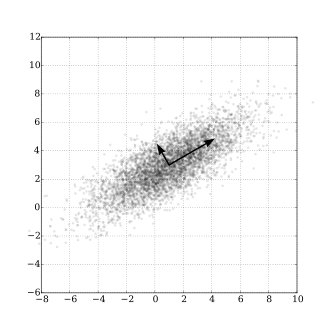

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables.




In [13]:

from sklearn.decomposition import PCA
scaler = preprocessing.StandardScaler().fit(churn_numeric)
X_scaled = preprocessing.scale(churn_encoded_numeric, with_mean=True, with_std=True )   # same as (df-df.mean())/df.std(ddof=0)
# start w n_components principal components and see how much variance that gives me
n_components = 20
# create instance of PCA (constructor)
pca = PCA(n_components=n_components)
#pca = PCA(copy=True, iterated_power='auto', n_components=n_components, random_state=None, svd_solver='auto', tol=0.0, whiten=False) 
pca.fit(X_scaled)
X_scaled = pca.transform(X_scaled)  #get the actual principal components as vectors
print(pca.explained_variance_ratio_) 

[0.27555526 0.10464656 0.06409387 0.05557135 0.04925943 0.04691599
 0.04592217 0.04125431 0.03776962 0.03198388 0.03010125 0.0299113
 0.02970606 0.02599394 0.02527462 0.02338131 0.02265926 0.02091303
 0.01995606 0.01913074]


# Create copy the PCA data to a Dataframe and print the top few rows

In [14]:
Col_headings = ['P'+str(x) for x in range(n_components)]
pcomps = pd.DataFrame(X_scaled) 
pcomps.columns = Col_headings
# concatenate the Churn column on the end so its easy to plot by Churn
if 'Churn' not in pcomps.columns:
    pcomps = pd.concat([pcomps, label], axis=1)
pcomps.head()


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P11,P12,P13,P14,P15,P16,P17,P18,P19,Churn
0,-1.922692,-2.283833,-2.158890,-0.154432,-0.618935,-1.200277,0.117462,1.260396,-2.010758,0.772399,...,2.522743,0.982327,-2.030329,-2.135955,0.379278,0.531365,-0.715107,-1.777744,-0.166543,No
1,-3.397563,3.091698,1.121608,-1.430595,-0.295236,-0.224767,-3.867416,-0.824483,0.049872,0.009934,...,-0.765139,-0.911590,-0.855955,2.525087,0.726530,-0.343061,0.022199,-0.263337,-0.555832,Yes
2,-2.408366,-0.953378,0.442139,-0.134140,-1.977757,1.424790,0.835296,1.784152,-0.235165,-1.971801,...,1.023000,-0.377367,-0.658978,-3.885713,-0.019587,-1.914421,0.945428,0.350196,0.436415,No
3,-1.980436,-4.245432,1.813833,0.765345,-0.893595,-2.111910,0.182554,1.781341,-0.949701,-0.642650,...,-1.847346,0.162522,0.544645,1.242134,-0.453658,1.351476,0.806391,-0.385737,-0.014308,No
4,-3.127633,2.457301,-1.230342,0.865804,-0.669829,-0.924849,1.363266,-0.121332,-1.445151,-0.579221,...,0.259661,-0.644676,2.367896,0.744413,0.599808,-1.068254,-1.017481,0.004432,-0.179690,No


# PCA Scree Plot

### Overview

A Scree Plot is a simple line segment plot that shows the fraction of total variance in the data as explained or represented by each PC. The PCs are ordered, and by definition are therefore assigned a number label, by decreasing order of contribution to total variance. The PC with the largest fraction contribution is labeled with the label name from the preferences file. Such a plot when read left-to-right across the abscissa can often show a clear separation in fraction of total variance where the 'most important' components cease and the 'least important' components begin. The point of separation is often called the 'elbow'.  (In the PCA literature, the plot is called a 'Scree' Plot because it often looks like a 'scree' slope, where rocks have fallen down and accumulated on the side of a mountain.)

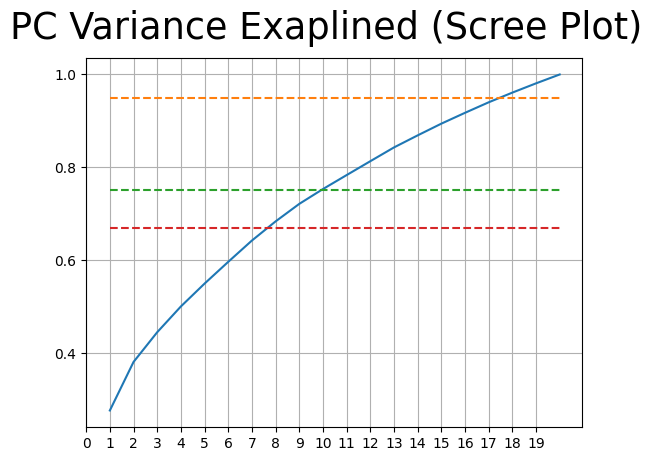

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# bin is my x axis variable
bin = []
for i in range (n_components):
    bin.append(i+1)
# plot the cummulative variance against the index of PCA
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(bin, cum_var)
# plot the 95% threshold, so we can read off count of principal components that matter
plt.plot(bin, [.95]*n_components, '--')
plt.plot(bin, [.75]*n_components, '--')
plt.plot(bin, [.67]*n_components, '--')
#turn on grid to make graph reading easier
plt.grid(True)
plt.rcParams.update({'font.size': 22})
plt.suptitle('PC Variance Exaplined (Scree Plot)')
# control number of tick marks
plt.xticks([i for i in range(0,n_components)])
plt.show()

# Plot Principal Components: Scatter Matrix

Control the **colors** by the ** churn variable** or by the cluster they are in

Get a feel for clsutering beahvior

* **black = no churn**

* **red = churn**

In [16]:
pcomps

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P11,P12,P13,P14,P15,P16,P17,P18,P19,Churn
0,-1.922692,-2.283833,-2.158890,-0.154432,-0.618935,-1.200277,0.117462,1.260396,-2.010758,0.772399,...,2.522743,0.982327,-2.030329,-2.135955,0.379278,0.531365,-0.715107,-1.777744,-0.166543,No
1,-3.397563,3.091698,1.121608,-1.430595,-0.295236,-0.224767,-3.867416,-0.824483,0.049872,0.009934,...,-0.765139,-0.911590,-0.855955,2.525087,0.726530,-0.343061,0.022199,-0.263337,-0.555832,Yes
2,-2.408366,-0.953378,0.442139,-0.134140,-1.977757,1.424790,0.835296,1.784152,-0.235165,-1.971801,...,1.023000,-0.377367,-0.658978,-3.885713,-0.019587,-1.914421,0.945428,0.350196,0.436415,No
3,-1.980436,-4.245432,1.813833,0.765345,-0.893595,-2.111910,0.182554,1.781341,-0.949701,-0.642650,...,-1.847346,0.162522,0.544645,1.242134,-0.453658,1.351476,0.806391,-0.385737,-0.014308,No
4,-3.127633,2.457301,-1.230342,0.865804,-0.669829,-0.924849,1.363266,-0.121332,-1.445151,-0.579221,...,0.259661,-0.644676,2.367896,0.744413,0.599808,-1.068254,-1.017481,0.004432,-0.179690,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-2.349781,0.103174,2.215962,0.089104,-0.268262,-1.530708,0.544848,1.663055,-0.558112,2.045211,...,2.051063,1.353166,-0.485692,-1.128494,-2.452774,0.682272,-0.187951,-0.280110,-1.392062,No
3329,4.254044,1.664160,0.759876,0.823748,-0.417199,-1.884574,0.986618,-0.012960,0.460705,0.088024,...,-1.471682,-0.499229,0.118380,-0.197216,0.106522,-0.996559,0.592694,0.123270,1.321366,Yes
3330,-1.766906,0.667318,-2.468494,3.813458,-0.996682,-1.148671,0.486503,-0.205243,0.197414,0.804076,...,1.768565,-1.095643,1.082715,-0.860313,0.865117,1.119740,0.720270,-0.680449,-1.140867,No
3331,-2.612563,2.251046,-0.683068,1.190486,-0.087411,3.149119,0.684541,-0.365232,-1.871670,0.092309,...,0.619324,1.396390,-1.681129,0.068823,-1.189823,-0.022529,-0.698835,0.353658,0.001124,No


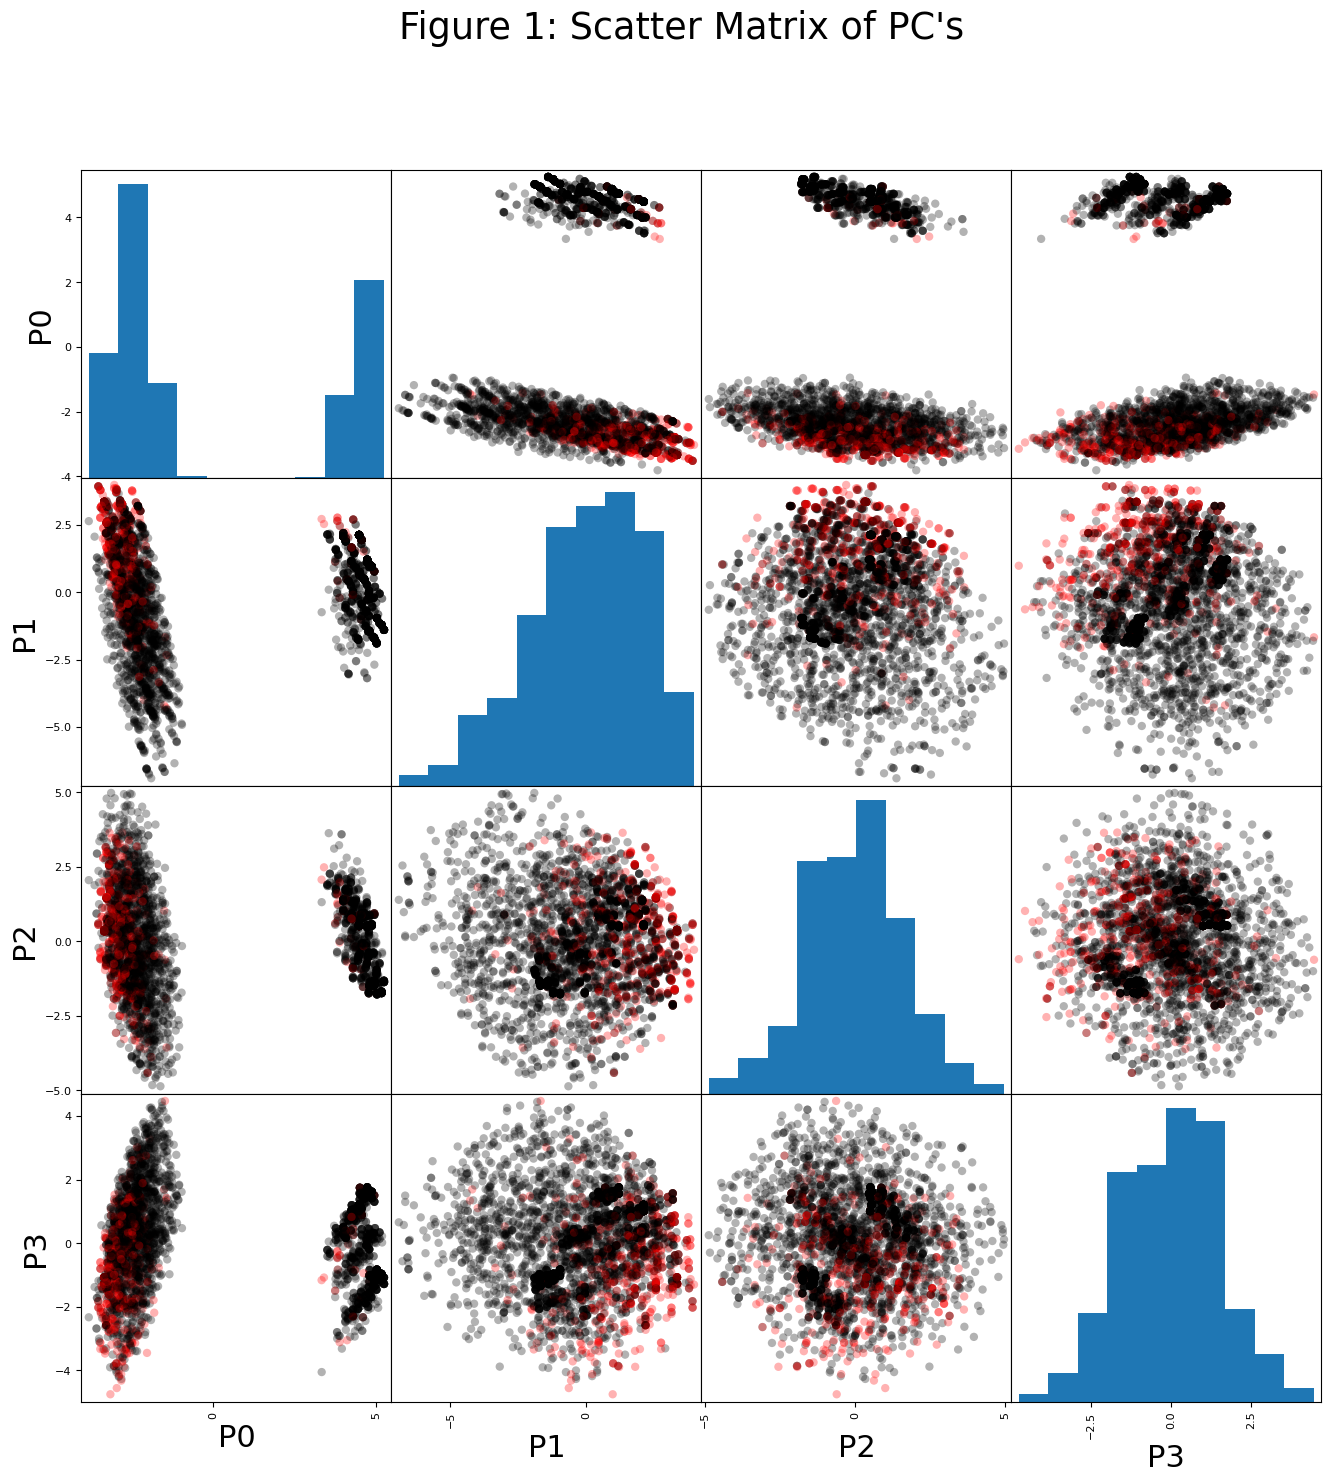

In [17]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Figure 1
# color the plot by the Churn variable
label_num = MyOneHotEncode (churn_cat, [], ['Churn'])
pcomps['Churn'] = label_num['ChurnYes']
# attributes are the index of Principal components to plot against each other
attributes = ['P{}'.format(i) for i in range(4)]
#attributes = [item + 10 for item in attributes]   # mthod to add if you want to look at the least significant components
churn_colors=['black', 'red']
# make a scatter plot
scatter_matrix(pcomps[attributes], alpha =.3, marker='o',c=pcomps.Churn.apply(lambda x:churn_colors[x]), figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='x',c=churn_cat_encode_new2.InternetService0.astype('int').apply(lambda x:churn_colors[x]), figsize=[16,16])
plt.rcParams.update({'font.size': 22})
plt.suptitle("Figure 1: Scatter Matrix of PC's")
plt.show()


Are the dots completely random?

Is there some patterning visible?

Are the Churn people (red) concentrated in certain places or randomly?

## Method to Drill Down to Specific Portion of the Data
We are keying off the graph above and noticing that P0 < 0 covers a major portionof the clusters

So what makes this part of the tick?

In [18]:
churn_encoded_numeric[pcomps['P0']>0].describe()

,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,StreamingTVNo,StreamingTVNo internet service,StreamingTVYes,TechSupportNo,TechSupportNo internet service,TechSupportYes,VoiceMailPlanNo,VoiceMailPlanYes,genderFemale,genderMale
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.0,1179.0,1179.0,1179.000000,1179.000000,...,1179.0,1179.0,1179.0,1179.0,1179.0,1179.0,1179.000000,1179.000000,1179.000000,1179.000000
mean,0.374046,0.259542,0.366412,0.587786,0.412214,0.0,1.0,0.0,0.928753,0.071247,...,0.0,1.0,0.0,0.0,1.0,0.0,0.695505,0.304495,0.488550,0.511450
std,0.484081,0.438569,0.482028,0.492442,0.492442,0.0,0.0,0.0,0.257346,0.257346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.460389,0.460389,0.500081,0.500081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,1.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,1.000000,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000



# Find KMeans Clusters in the PCA Data

Lets use an algorithm to groups clusters it finds together. We will label our data with the clusters we find so we can sort and filter as needed

Here we use kmeans as a quick and dirty clustering method to get a better feel for customer behavior

Ideally I would like to identify a cluster for each natural cluster of customer bevaior

Armed with this I may decide to sgement out interesting populations for prediction, or I may decide that one big prediction against all the data is best

We will augment the rows of the dataset with the cluster information so that it can be used in our models

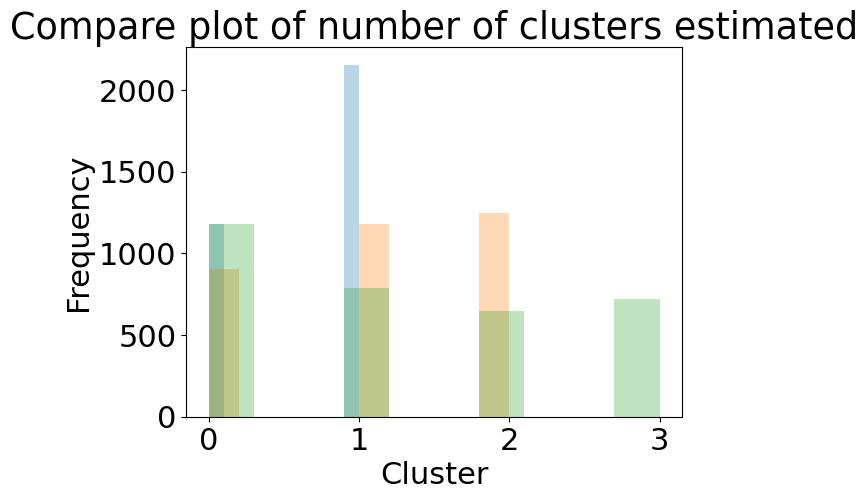

In [19]:
from sklearn.cluster import KMeans
import numpy as np

#sweep number of clusters to try, plot result
def my_kmeans(pcomps, n_clusters):
    cols = ['P{}'.format(i) for i in range(4)]
    x = pcomps[cols].to_numpy()
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
    kmeans.labels_
    X_scaled.shape
    #kmeans.cluster_centers_
    txt = 'kmeans' + str(n_clusters)
    pcomps[txt]=kmeans.labels_
    return pcomps

pcomps = my_kmeans(pcomps,2)
pcomps = my_kmeans(pcomps,3)
pcomps = my_kmeans(pcomps,4)
pcomps = my_kmeans(pcomps,5)


plt.hist( pcomps['kmeans2'], alpha = .3)
plt.title("Compare plot of number of clusters estimated")
plt.xlabel("Cluster")
plt.ylabel("Frequency")

plt.hist( pcomps['kmeans3'], alpha = .3)
plt.xlabel("Cluster")
plt.ylabel("Frequency")

plt.hist( pcomps['kmeans4'], alpha = .3)
plt.xlabel("Cluster")
plt.ylabel("Frequency")

plt.show()

In [20]:
churn_scaled = pd.concat([churn_scaled, pcomps['kmeans2']], axis=1)
churn_scaled = pd.concat([churn_scaled, pcomps['kmeans3']], axis=1)
churn_scaled = pd.concat([churn_scaled, pcomps['kmeans4']], axis=1)
churn_scaled = pd.concat([churn_scaled, pcomps['kmeans5']], axis=1)
churn_encoded_numeric = pd.concat([churn_encoded_numeric, pcomps['kmeans2']], axis=1)
churn_encoded_numeric = pd.concat([churn_encoded_numeric, pcomps['kmeans3']], axis=1)
churn_encoded_numeric = pd.concat([churn_encoded_numeric, pcomps['kmeans4']], axis=1)
churn_encoded_numeric = pd.concat([churn_encoded_numeric, pcomps['kmeans5']], axis=1)


# Examine Specific Cluster Like This

In [21]:
churn_encoded_numeric[pcomps['kmeans5']==1].head()

,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,TechSupportNo internet service,TechSupportYes,VoiceMailPlanNo,VoiceMailPlanYes,genderFemale,genderMale,kmeans2,kmeans3,kmeans4,kmeans5
8,1,0,0,1,0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
12,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
16,0,1,0,1,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,1
28,1,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
30,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,1


# Experiment with 3D plot: Red = Churn
This may give a better feel for the clustering behavior

Control the colors as you wish, here we color Churners red
**red = Churn**

The plot should be interactive so you can rotate it a see where churners live

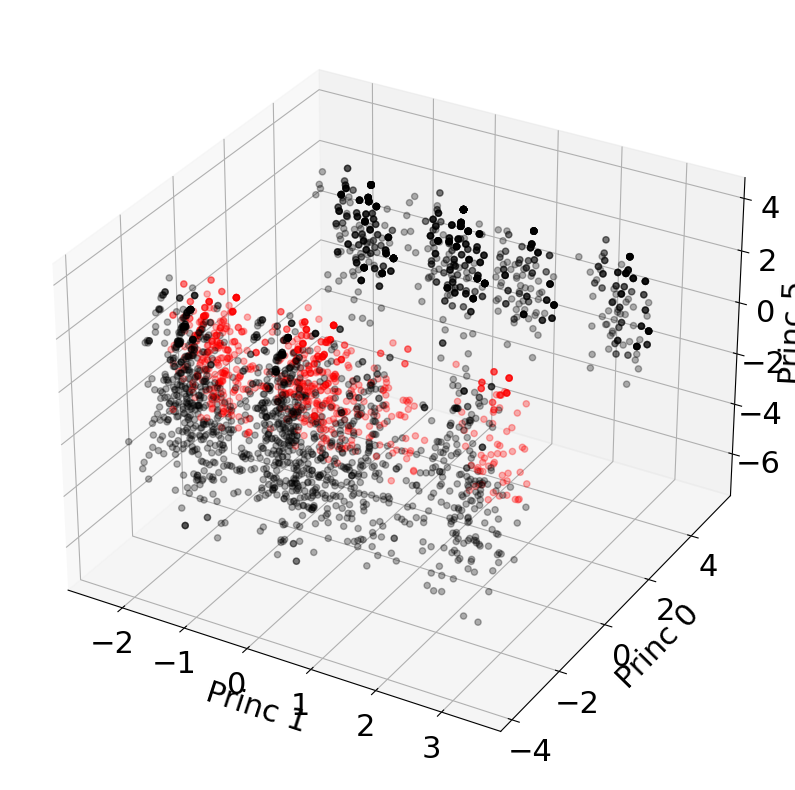

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
colors=['black','red']
#df = pcomps[pcomps['kmeans3']==2]
df = pcomps
churn_colors=['red' , 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
ax.scatter(df['P5'], df['P0'], df['P1'],c=df['kmeans5'].apply(lambda x:churn_colors[x]), alpha = .3 )

ax.set_xlabel('Princ 1')
ax.set_ylabel('Princ 0')
ax.set_zlabel('Princ 5')

plt.show()




# One Approach to Outliers (DBSCAN Visualization)

Control the **colors** by the **cluster** they are in

Get a feel for clsutering behavior

We added the cluster number to the dataframe so we can drill down as needed to examine a cluster in more detail.

When we create the model we might decide to take advantage of our feature engineering here or we might decide to let the ML/DL algorithm use all the data to make predictions.

**NOTE:** Be careful with relying on the cluster number. These were established by random selection. So each time we run we may get a different cluster number for what humans percieve as a clsuter or the k-means may find different clusters entirely. Specifying a random seed or using a different cluster methods, such SOM may make this part more rubust.

It would be great if we coudl isolate the different communities from each other and see if this effects the chrun prediction

eps:6.3 Estimated number of clusters: 1
Outliers: 321:   Estimated number of clusters: 1


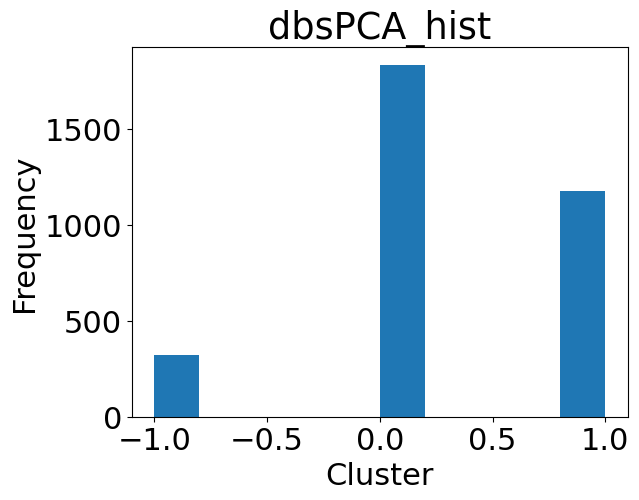

In [23]:
### import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
# X = pcomps.iloc[[1, 3, 5], [1, 3]]
X = pcomps
np.random.seed(42)

# try eps of 6.5, then observe a small number of points are classified as -1 (Outliers)
pcomps2, labels, n_clusters = my_dbscan(X, 6.3 )  # call my_dbscan with df=X, eps = 4
#dbscan finds 2 clusters account for most points with min cluster distance 6.3

dbsPCA_hist = pcomps2.dbsPCA
print('Outliers: {}:   Estimated number of clusters: {}'.format(  dbsPCA_hist.tolist().count(-1),  n_clusters) )
plt.hist( dbsPCA_hist)
plt.title("dbsPCA_hist")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
#plt.axis([-1,n_clusters,0,7200])
plt.show()

In [24]:
churn_encoded_numeric = pd.concat([churn_encoded_numeric, pcomps['dbsPCA']], axis=1)


In [25]:
churn_encoded_numeric.head()

,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,TechSupportYes,VoiceMailPlanNo,VoiceMailPlanYes,genderFemale,genderMale,kmeans2,kmeans3,kmeans4,kmeans5,dbsPCA
0,0,1,0,0,1,1,0,0,1,0,...,1,1,0,1,0,1,0,2,4,-1
1,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,1,2,1,2,0
2,1,0,0,0,1,1,0,0,1,0,...,1,0,1,1,0,1,0,2,4,0
3,0,0,1,1,0,0,0,1,1,0,...,1,1,0,1,0,1,0,2,4,0
4,1,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,2,3,0,0


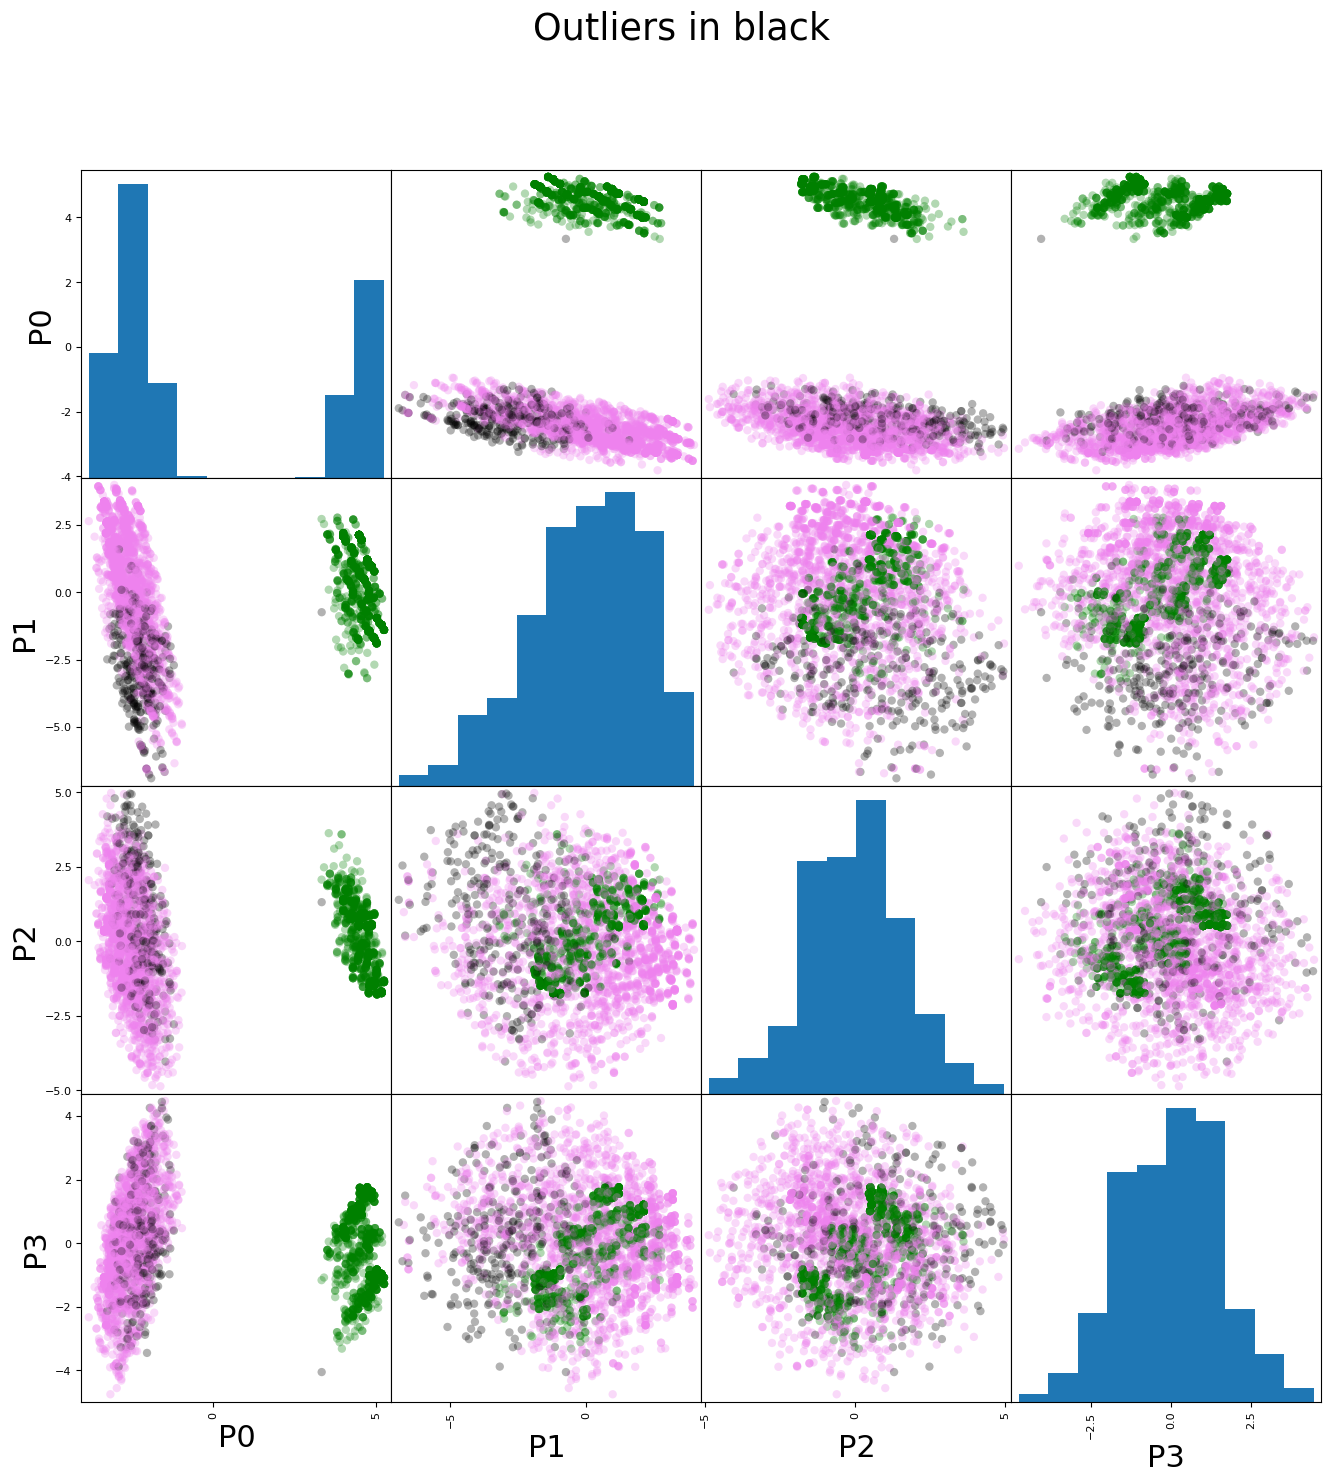

In [26]:
# Figure 2
# plot each cluster a different color so we can see what cluster number is associated with each blob
df2 = pcomps
#df2 = pcomps[pcomps['Churn'] == 1]
# make a scatter plot
#attributes = [0, 1, 2]
#colors=['blue','green','yellow']

attributes = ['P{}'.format(i) for i in range(4)]

colors=['black', 'violet','green','blue', 'yellow', 'red', 'gray', 'white', 'orange']
scatter_matrix(df2[attributes],figsize=[16,16],marker='o', alpha=.3, c=df2['dbsPCA'].apply(lambda x:colors[x+1]))
plt.rcParams.update({'font.size': 22})
plt.suptitle("Outliers in black")
plt.show()

In [27]:
print('Outliers: {} '.format(  dbsPCA_hist.tolist().count(-1)) )
churn_encoded_numeric[churn_encoded_numeric['dbsPCA']<0].describe()

Outliers: 321 


,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,TechSupportYes,VoiceMailPlanNo,VoiceMailPlanYes,genderFemale,genderMale,kmeans2,kmeans3,kmeans4,kmeans5,dbsPCA
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,...,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.0
mean,0.193146,0.473520,0.333333,0.523364,0.476636,0.339564,0.003115,0.657321,0.794393,0.205607,...,0.601246,0.554517,0.445483,0.467290,0.532710,0.996885,0.127726,1.987539,3.579439,-1.0
std,0.395383,0.500078,0.472141,0.500234,0.500234,0.474301,0.055815,0.475346,0.404776,0.404776,...,0.490406,0.497795,0.497795,0.499708,0.499708,0.055815,0.486580,0.418144,1.078518,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,-1.0
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,4.000000,-1.0
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,4.000000,-1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,-1.0


# Examine Outliers Statistics Like This

Compare leading differnces bewteen Outliers and general population

Notice that the ratio of the histogram values for Outliers versus general population are different - pretty dramtically

array([[<AxesSubplot: title={'center': 'ContractOne year'}>]],
      dtype=object)

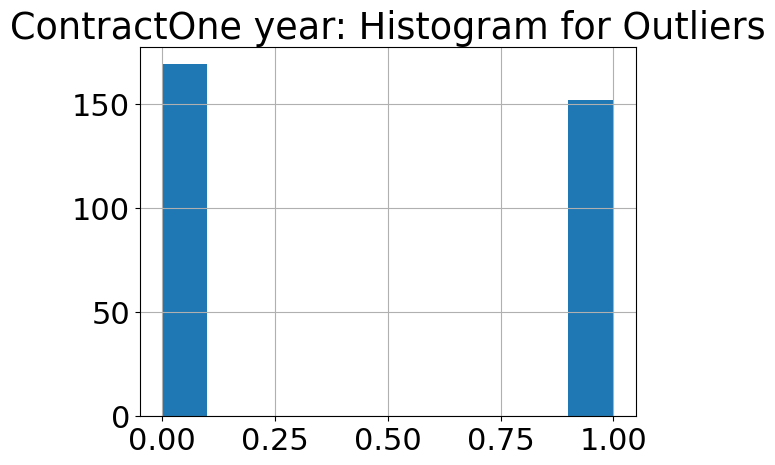

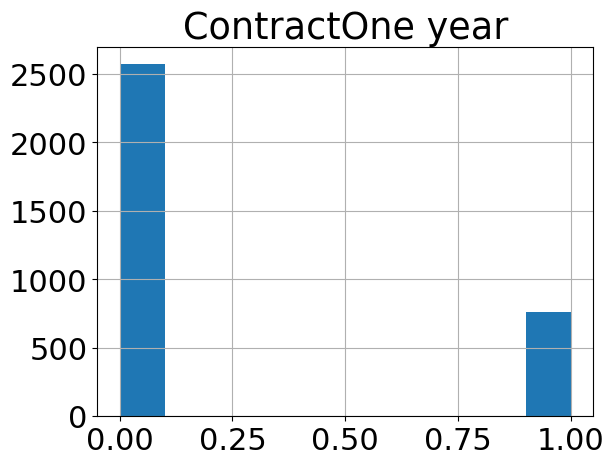

In [28]:
#churn_encoded_numeric[pcomps['dbsPCA']<0].head()
if 'Churn' not in churn_encoded_numeric.columns:
    churn_numeric = pd.concat([churn_encoded_numeric, label], axis=1)  # add numeric to main df
churn_numeric[pcomps['dbsPCA']<0]

TotalC = churn_numeric[pcomps['dbsPCA']<0]  # outliers in DBSCAN have value -1
TotalC.hist(column = 'ContractOne year')

plt.title('ContractOne year: Histogram for Outliers')
churn_numeric.hist(column = 'ContractOne year')


In [29]:
churn_encoded_numeric[pcomps['dbsPCA']<0].describe()

,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,TechSupportYes,VoiceMailPlanNo,VoiceMailPlanYes,genderFemale,genderMale,kmeans2,kmeans3,kmeans4,kmeans5,dbsPCA
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,...,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.0
mean,0.193146,0.473520,0.333333,0.523364,0.476636,0.339564,0.003115,0.657321,0.794393,0.205607,...,0.601246,0.554517,0.445483,0.467290,0.532710,0.996885,0.127726,1.987539,3.579439,-1.0
std,0.395383,0.500078,0.472141,0.500234,0.500234,0.474301,0.055815,0.475346,0.404776,0.404776,...,0.490406,0.497795,0.497795,0.499708,0.499708,0.055815,0.486580,0.418144,1.078518,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,-1.0
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,4.000000,-1.0
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,4.000000,-1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,-1.0


In [30]:
churn_encoded_numeric.describe()

,ContractMonth-to-month,ContractOne year,ContractTwo year,DependentsNo,DependentsYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,InternationalPlanNo,InternationalPlanYes,...,TechSupportYes,VoiceMailPlanNo,VoiceMailPlanYes,genderFemale,genderMale,kmeans2,kmeans3,kmeans4,kmeans5,dbsPCA
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.537054,0.228623,0.234323,0.671167,0.328833,0.396040,0.353735,0.250225,0.903090,0.096910,...,0.240324,0.723372,0.276628,0.486349,0.513651,0.646265,1.103210,1.273027,1.947495,0.257126
std,0.498700,0.420009,0.423639,0.469860,0.469860,0.489146,0.478200,0.433208,0.295879,0.295879,...,0.427344,0.447398,0.447398,0.499889,0.499889,0.478200,0.797373,1.156892,1.413132,0.619473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000


# Modeling

## Split Data - Training/Test

Determine if patching as default makes sense in the given dataset scenario.

**Exercise:**
run the train_test_split both patched and unpatched and observe any speed differences for this particualr dataset

In [31]:
# to make this notebook's output identical at every run
np.random.seed(42)
import time

from sklearn.model_selection import train_test_split

if 'Churn' in churn_numeric.columns:
    churn_numeric =  churn_numeric.drop('Churn', 1)

t1 = time.time()
train_set, test_set, y_train, y_test = train_test_split(churn_numeric, label_num['ChurnYes'], test_size=0.2)
t2 = time.time()
print('Elapsed: ', t2 - t1)

Elapsed:  0.05601000785827637


/home/u78349/tmp/ipykernel_2538807/3558406885.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  churn_numeric =  churn_numeric.drop('Churn', 1)


# First Model - Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_set, test_set, y_train, y_test
clf = DecisionTreeClassifier()
clf.fit(train_set, y_train)
predicted = clf.predict(test_set)
print ("accuracy ", accuracy_score(y_test, predicted ) )

accuracy  0.8290854572713643


**Excercise:**

Fill in the table below to report the times for patched and unpatched:

Algorithm |Patched Time |UnPatched Time
-----|-----|----- 
PCA|.....|.....
Kmeans|.....|.....
DBSCAN|.....|.....
Train_test_split|.....|.....
Decision Tree|.....|.....
SVC|.....|.....
Random Forest|.....|.....

In [33]:
print("All Done")

All Done
